<a href="https://colab.research.google.com/github/SarkarPriyanshu/Machine-Learning-Models/blob/main/SellingPrice_of_Product_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

from sklearn.model_selection import train_test_split

from matplotlib.legend_handler import HandlerLine2D
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/dataset/train.csv')

In [4]:
df.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [5]:
df.shape

(6368, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [7]:
np.round(df.isnull().sum() / df.shape[0] * 100,2)

Product_id          0.00
Stall_no            0.08
instock_date        0.00
Market_Category     0.00
Customer_name       3.31
Loyalty_customer    0.00
Product_Category    0.00
Grade               0.00
Demand              0.00
Discount_avail      0.60
charges_1           3.11
charges_2 (%)       3.22
Minimum_price       0.60
Maximum_price       5.39
Selling_Price       0.64
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


<AxesSubplot:>

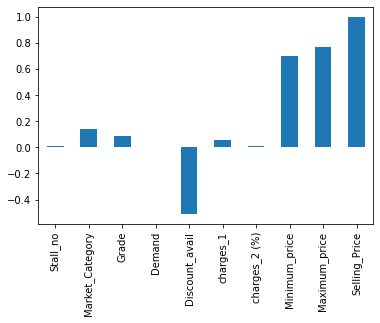

In [10]:
df.corr()['Selling_Price'].plot(kind='bar')

In [11]:
df.sample(5)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
3021,KTAEHE9H9MVK42JA,35.0,2014-11-08 17:15:45.000,23,NaN,Yes,Home_decor,2,3,0.0,282.0,17.0,4819.0,11778.0,8593.750539
6023,BRAEGJFXKH8YPEZZ,28.0,2016-03-29 21:01:23.000,358,Camrynn,No,Organic,3,46,0.0,142.0,8.0,4575.0,14648.0,9698.718384
5586,ACCE7XGJXH9JZG59,24.0,2015-08-17 21:08:42.000,443,Davian,Yes,Technology,0,96,1.0,508.0,7.0,NaN,7774.0,1087.332154
391,BRAE6MPEE4X6CMB4,49.0,2015-08-17 23:21:01.000,449,Denver,Yes,Pet_care,0,11,0.0,132.0,6.0,683.0,987.0,967.403250
792,ACCEDJHQHQBZQY46,22.0,2015-08-16 22:23:27.000,38,Avalyn,No,Hospitality,3,8,1.0,315.0,9.0,6142.0,10108.0,1266.969790


# Without any analytics and proprocessing

### Linear Regressor Model

In [12]:
df['Product_Category'] = df['Product_Category'].map({value:index for index,value in  enumerate(list(df['Product_Category'].value_counts().to_dict().keys()))}) 

In [13]:
df['Loyalty_customer'] = df['Loyalty_customer'].map({'Yes':1,'No':0})

In [14]:
df = df.dropna()

In [15]:
df.shape

(3274, 15)

In [16]:
df =  df.drop(['Product_id','instock_date','Customer_name'],axis=1)

In [17]:
df.sample(5)

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
992,36.0,11,1.0,0,3,21,0.0,103.0,9.0,408.0,2100.0,1354.734675
5658,13.0,447,1.0,8,0,72,0.0,148.0,15.0,4493.0,6100.0,5397.915600
4822,37.0,49,1.0,0,2,8,0.0,171.0,6.0,427.0,564.0,666.733320
2870,46.0,58,1.0,8,0,33,1.0,130.0,14.0,6676.0,9908.0,1261.878896
5115,5.0,11,1.0,5,3,83,0.0,506.0,8.0,516.0,1357.0,1422.467200


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3274 entries, 0 to 6367
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          3274 non-null   float64
 1   Market_Category   3274 non-null   int64  
 2   Loyalty_customer  3274 non-null   float64
 3   Product_Category  3274 non-null   int64  
 4   Grade             3274 non-null   int64  
 5   Demand            3274 non-null   int64  
 6   Discount_avail    3274 non-null   float64
 7   charges_1         3274 non-null   float64
 8   charges_2 (%)     3274 non-null   float64
 9   Minimum_price     3274 non-null   float64
 10  Maximum_price     3274 non-null   float64
 11  Selling_Price     3274 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 332.5 KB


In [19]:
df.isnull().sum()

Stall_no            0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

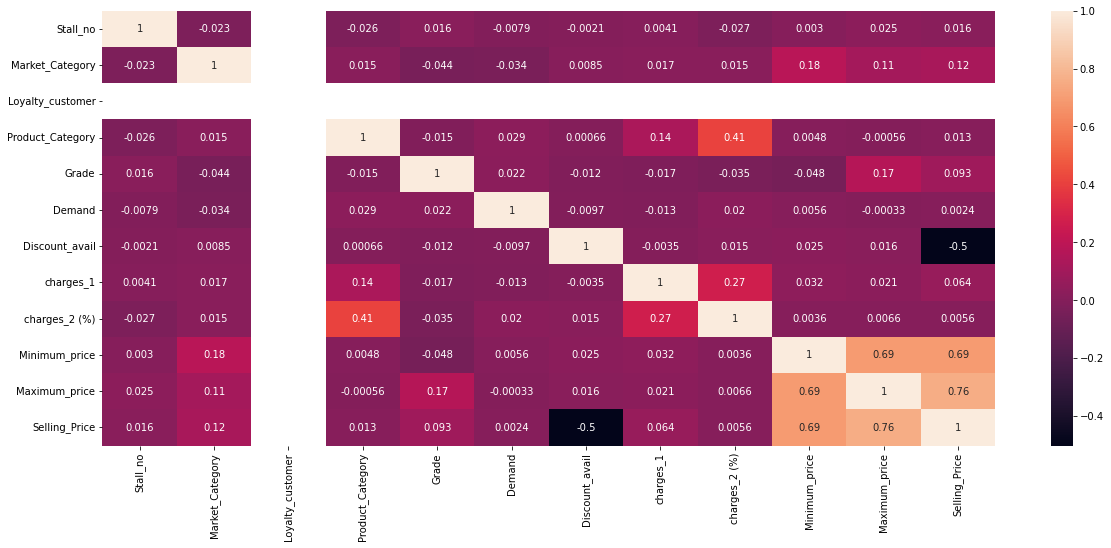

In [20]:
# Another Technique


fig, ax = plt.subplots(figsize=(20, 8))
 
# drawing the plot
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Selling_Price',axis=1), df['Selling_Price'], test_size=0.30, random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2291, 11), (983, 11), (2291,), (983,))

In [23]:
reg = LinearRegression()

In [24]:
reg = reg.fit(X_train,y_train)

In [25]:
test_pred = reg.predict(X_test)

In [26]:
train_pred = reg.predict(X_train)

In [27]:
f'mean_absolute_error: {mean_absolute_error(y_train,train_pred)},mean_squared_error: {np.sqrt(mean_squared_error(y_train,train_pred))},r2_score: {r2_score(y_train,train_pred)}'

'mean_absolute_error: 512.7568165863498,mean_squared_error: 1030.199142636487,r2_score: 0.8945432980346371'

In [28]:
f'mean_absolute_error: {mean_absolute_error(y_test,test_pred)},mean_squared_error :{np.sqrt(mean_squared_error(y_test,test_pred))},r2_score {r2_score(y_test,test_pred)}'

'mean_absolute_error: 535.5485915341952,mean_squared_error :999.8969472108503,r2_score 0.9069483202066353'

In [29]:
residual = y_test - test_pred

### 3. Normality of Residual

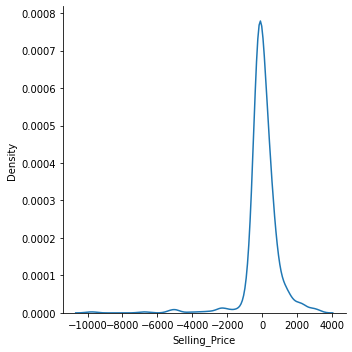

In [30]:
sns.displot(residual,kind='kde')

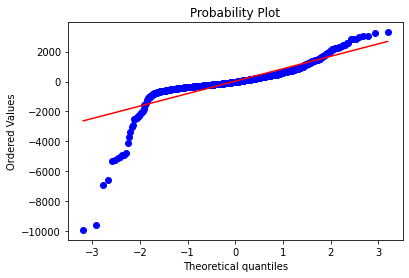

In [31]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

### 4. Homoscedasticity

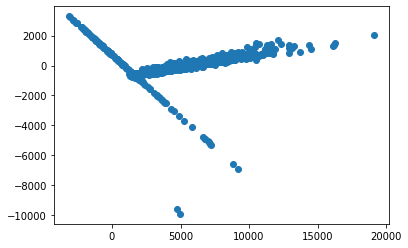

In [32]:
plt.scatter(test_pred,residual)

### 5. Autocorrelation of Residuals

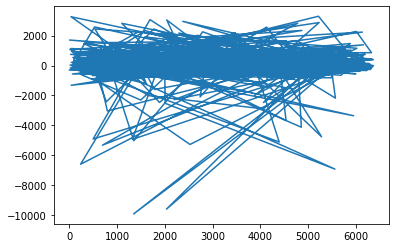

In [33]:
plt.plot(residual)

### Ridge Regressor Model

In [52]:
mean_absolute_error_train_list = list()
mean_absolute_error_test_list = list()
mean_squared_error_train_list = list()
mean_squared_error_test_list = list()
r2_score_train_list = list()
r2_score_test_list = list()
range = np.linspace(0,1,100)
coefs = list()

for i in range:
  clf = Ridge(alpha=i)
  clf = clf.fit(X_train,y_train)
  test_pred = clf.predict(X_test)
  train_pred = clf.predict(X_train)


  coefs.append(reg.coef_.tolist())
  mean_absolute_error_train_list.append(mean_absolute_error(y_train,train_pred))
  mean_squared_error_train_list.append(np.sqrt(mean_squared_error(y_train,train_pred)))
  r2_score_train_list.append(r2_score(y_train,train_pred))

  mean_absolute_error_test_list.append(mean_absolute_error(y_test,test_pred))
  mean_squared_error_test_list.append(np.sqrt(mean_squared_error(y_test,test_pred)))
  r2_score_test_list.append(r2_score(y_test,test_pred))

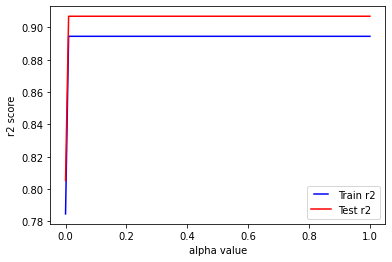

In [53]:
line1, = plt.plot(range, r2_score_train_list, 'b', label='Train r2')
line2, = plt.plot(range, r2_score_test_list, 'r', label='Test r2')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
 
plt.ylabel('r2 score')
plt.xlabel('alpha value')
plt.show() 

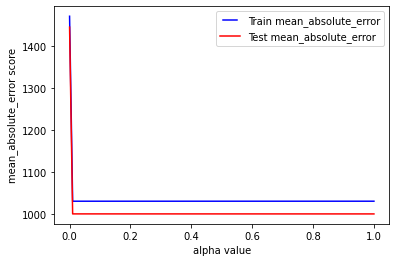

In [54]:
line1, = plt.plot(range, mean_squared_error_train_list, 'b', label='Train mean_absolute_error')
line2, = plt.plot(range, mean_squared_error_test_list, 'r', label='Test mean_absolute_error')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
 
plt.ylabel('mean_absolute_error score')
plt.xlabel('alpha value')
plt.show() 

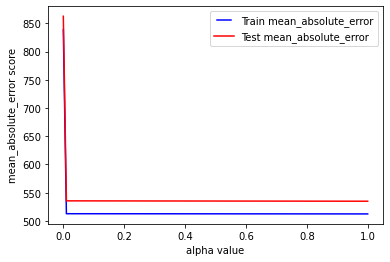

In [55]:
line1, = plt.plot(range, mean_absolute_error_train_list, 'b', label='Train mean_absolute_error')
line2, = plt.plot(range, mean_absolute_error_test_list, 'r', label='Test mean_absolute_error')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
 
plt.ylabel('mean_absolute_error score')
plt.xlabel('alpha value')
plt.show() 

In [38]:
len(coefs)

50

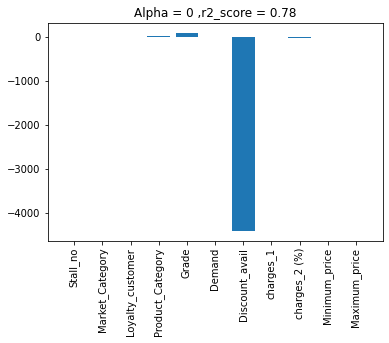

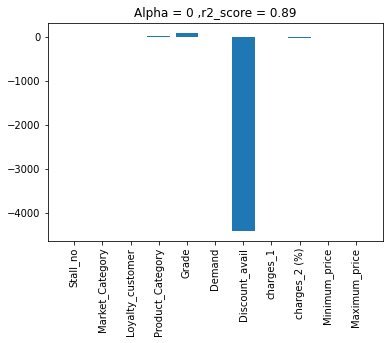

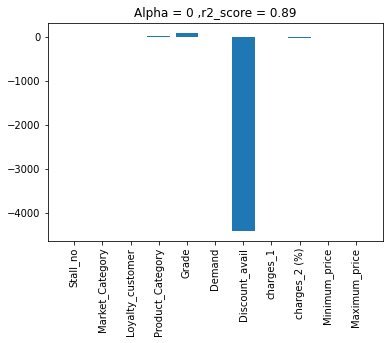

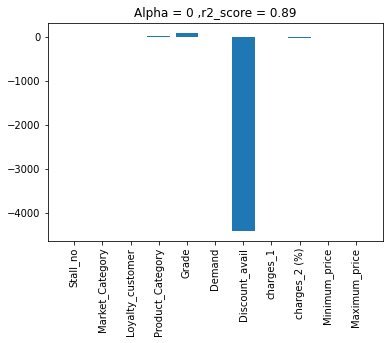

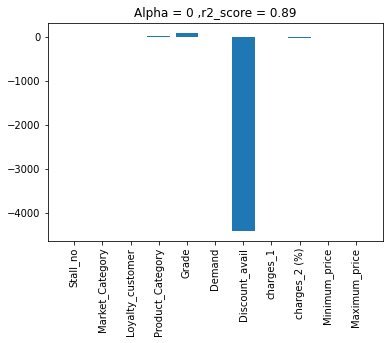

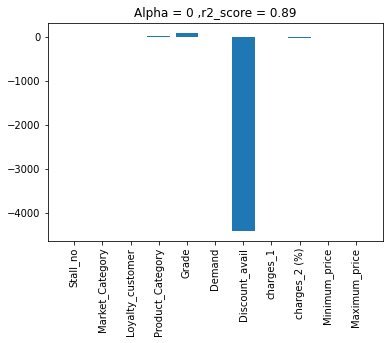

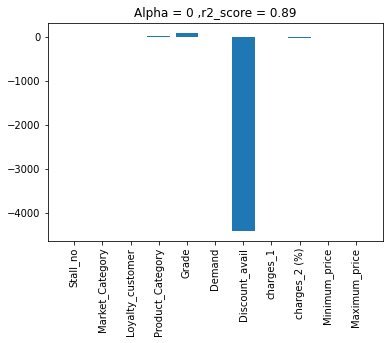

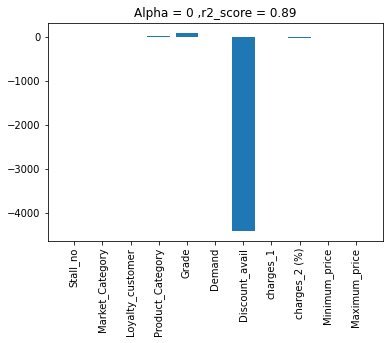

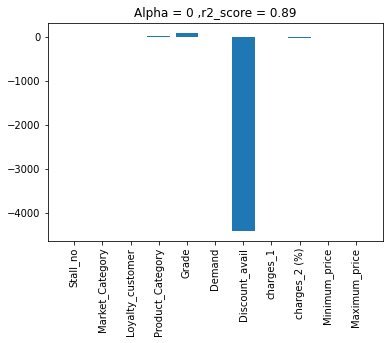

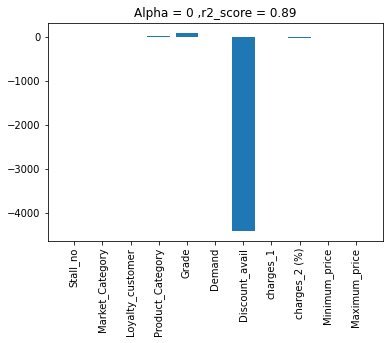

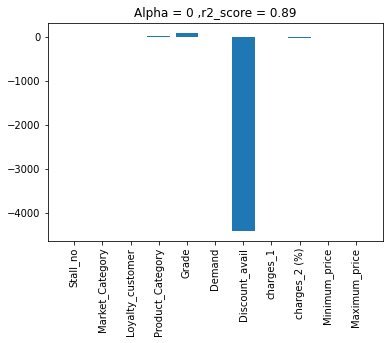

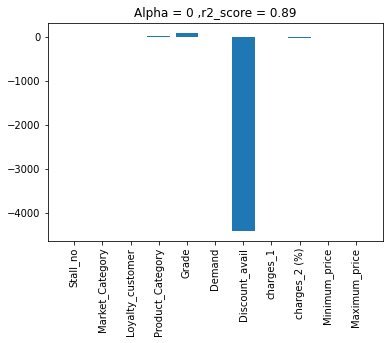

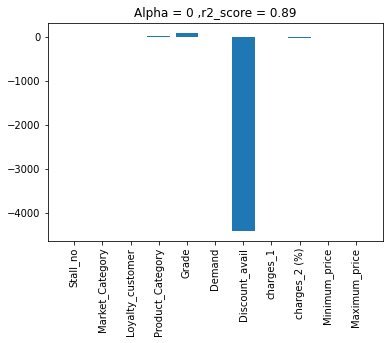

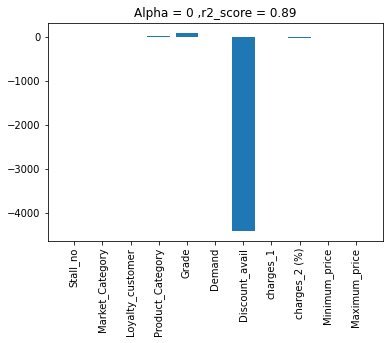

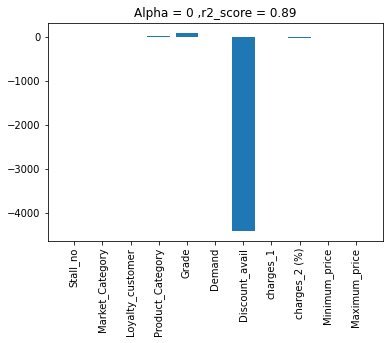

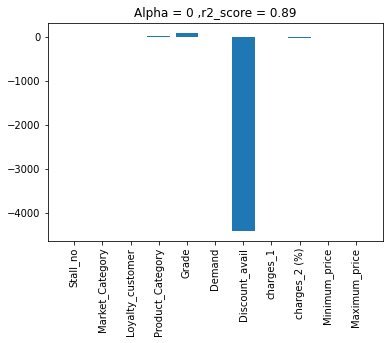

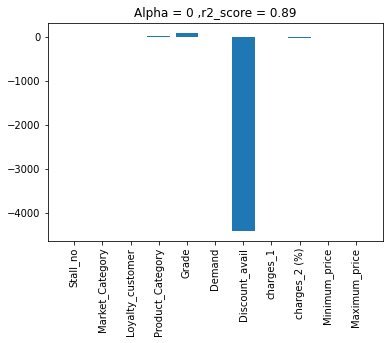

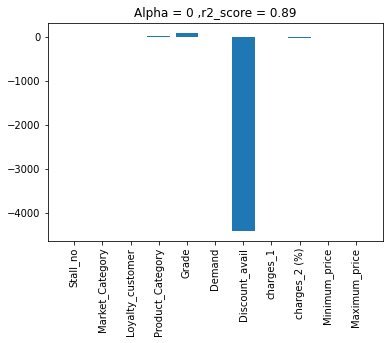

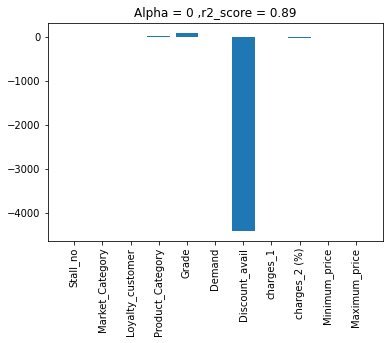

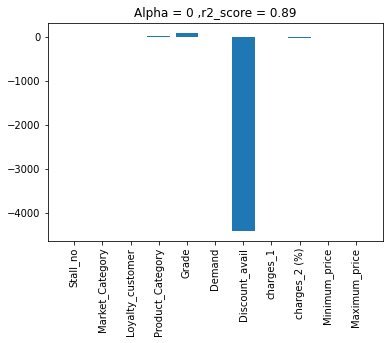

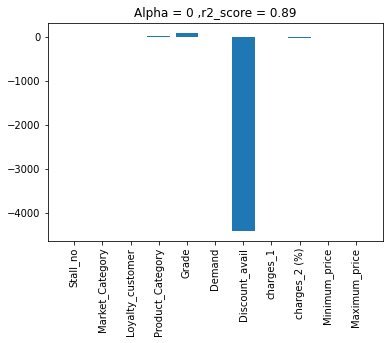

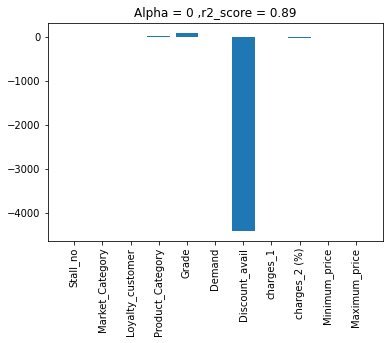

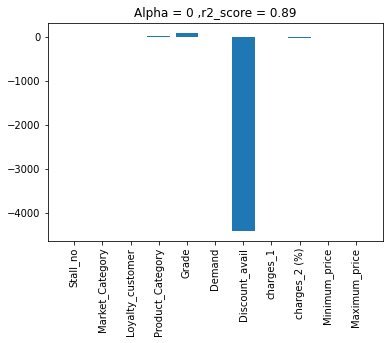

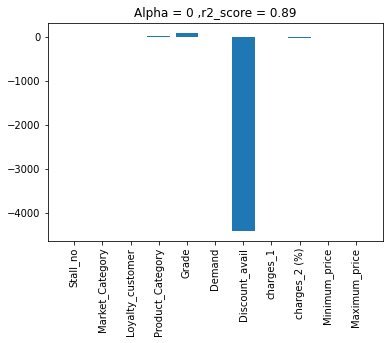

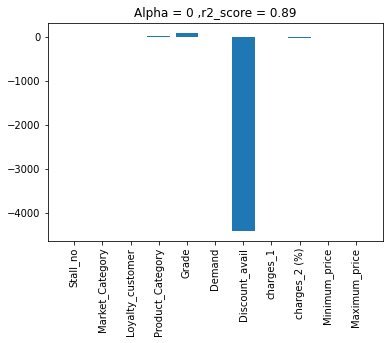

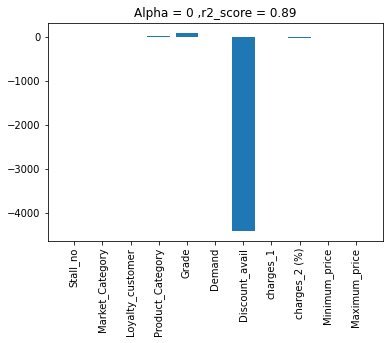

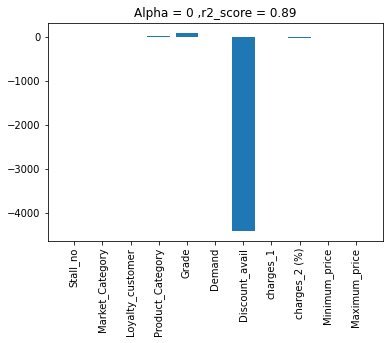

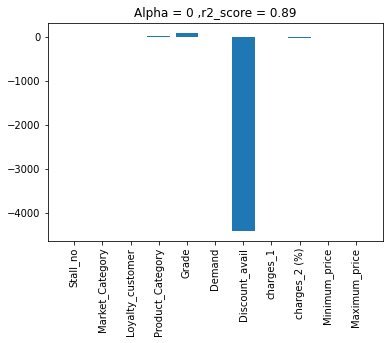

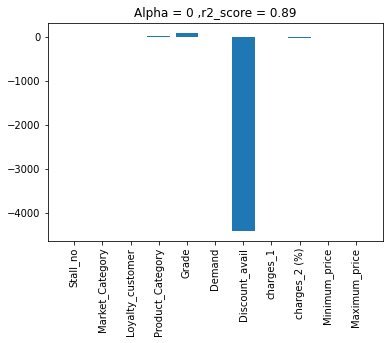

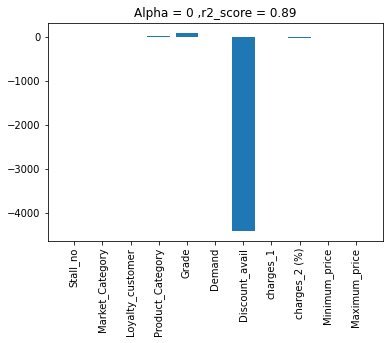

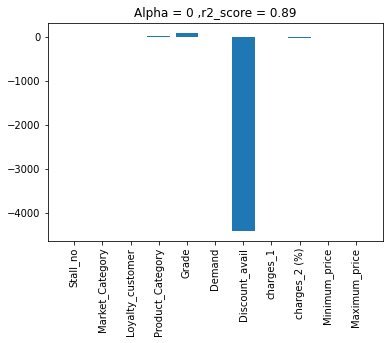

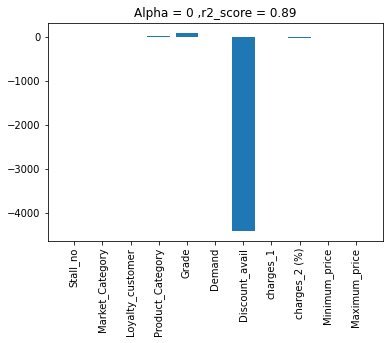

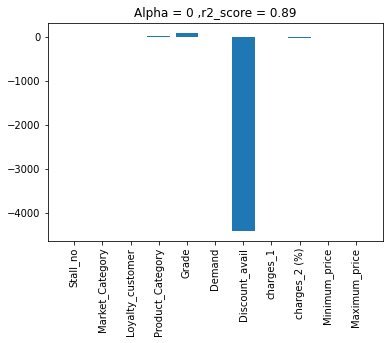

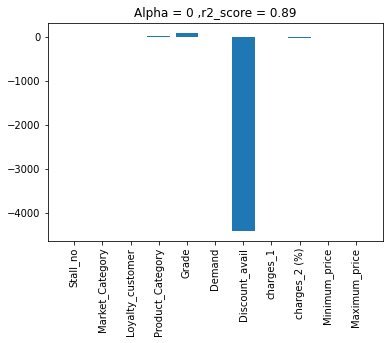

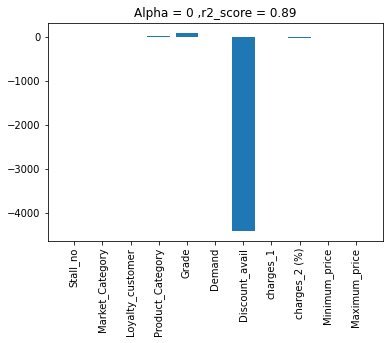

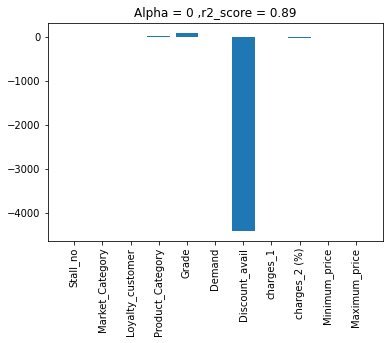

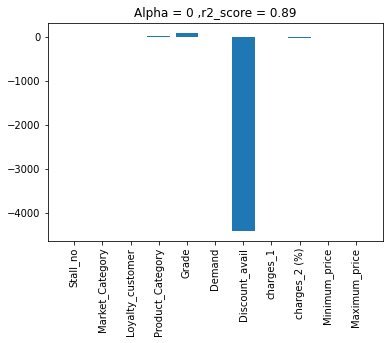

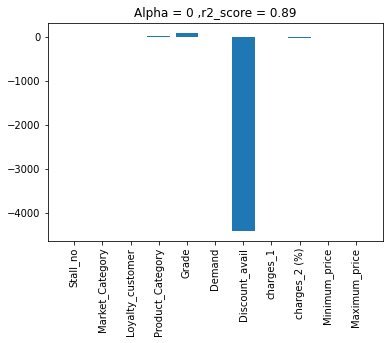

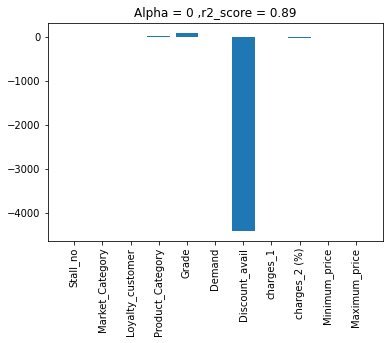

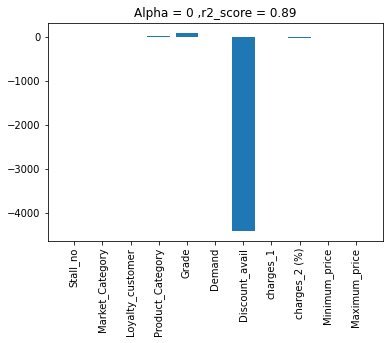

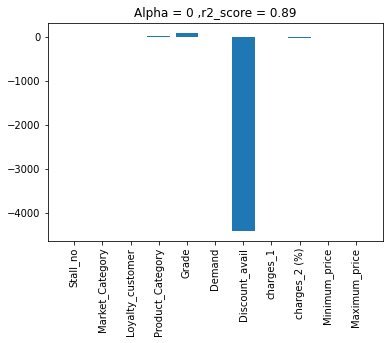

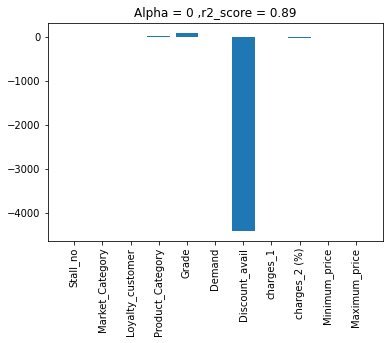

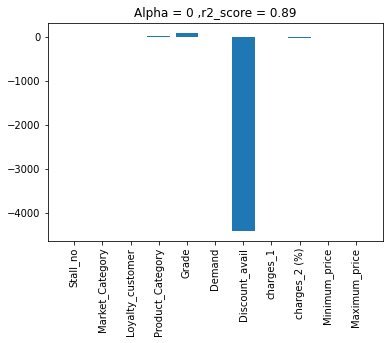

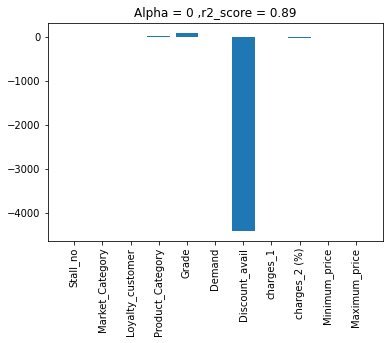

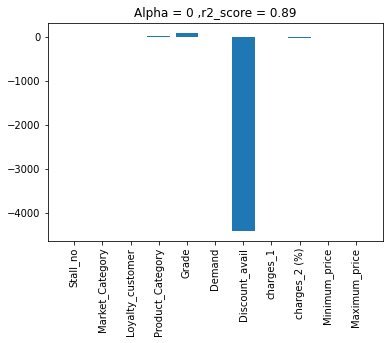

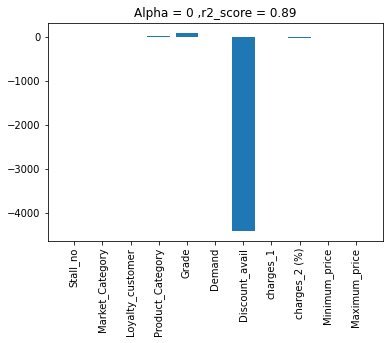

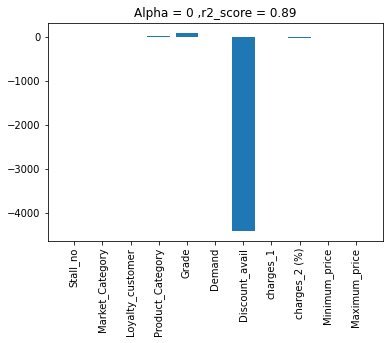

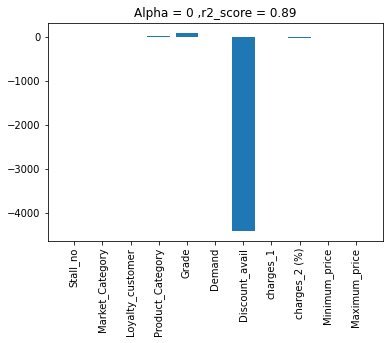

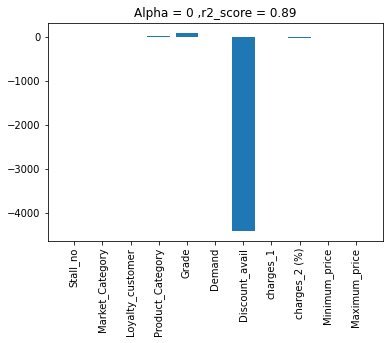

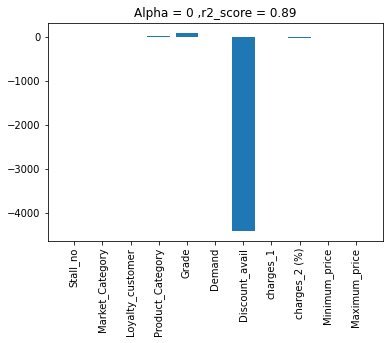

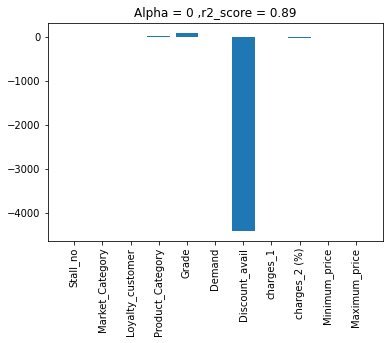

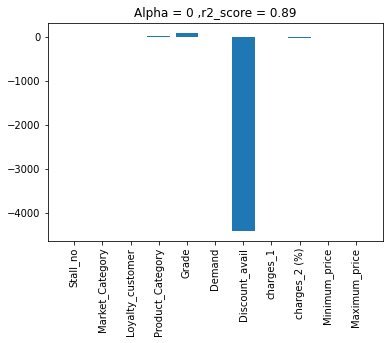

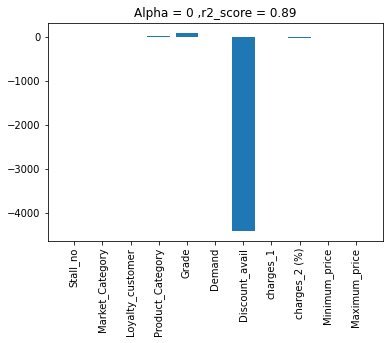

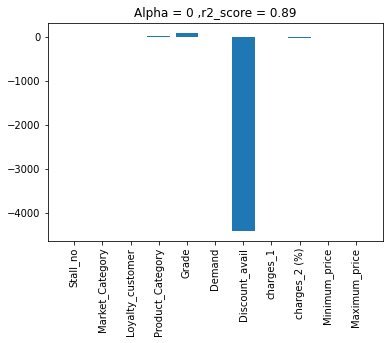

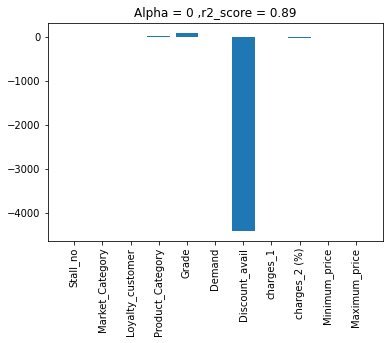

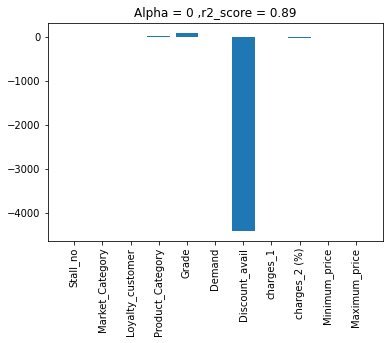

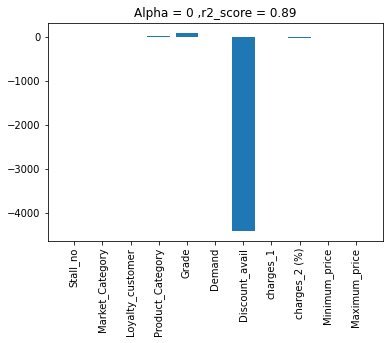

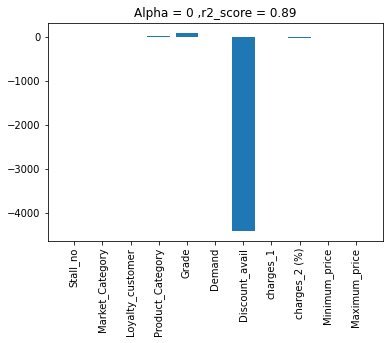

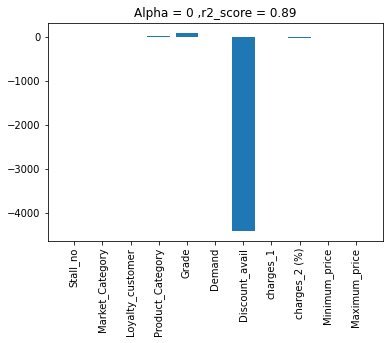

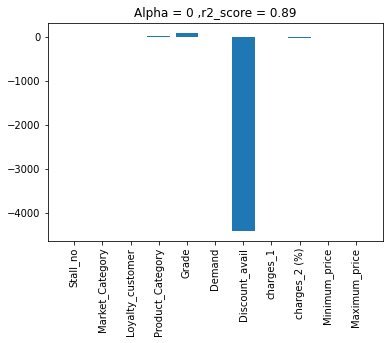

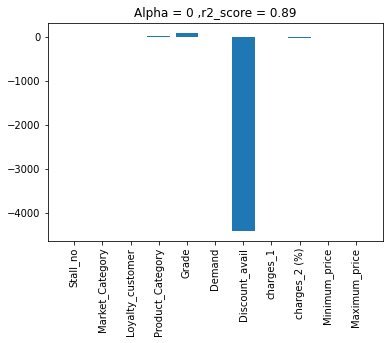

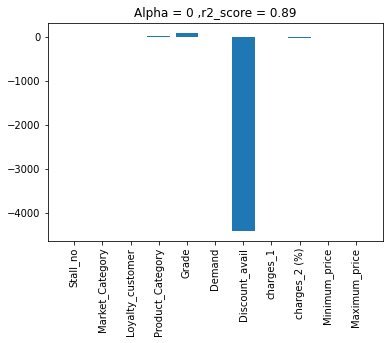

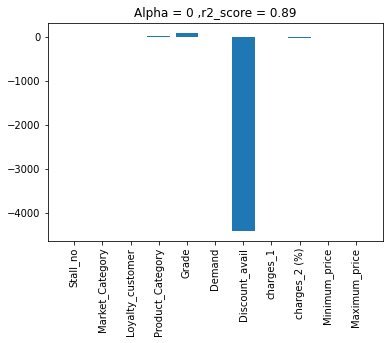

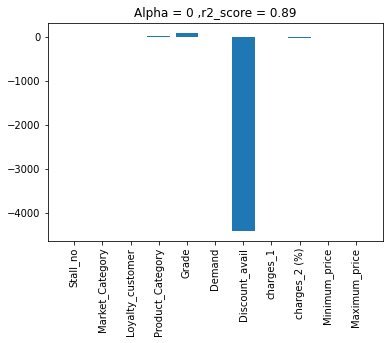

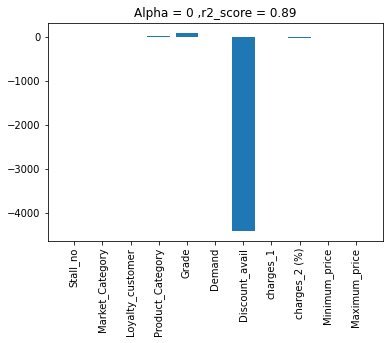

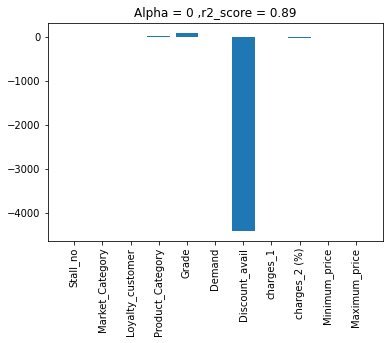

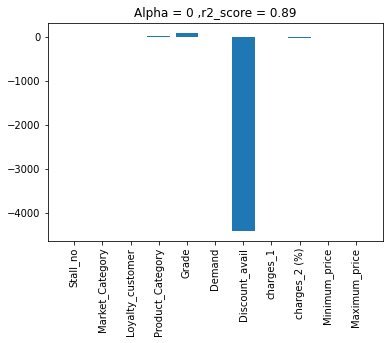

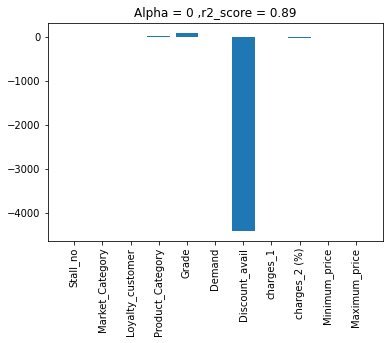

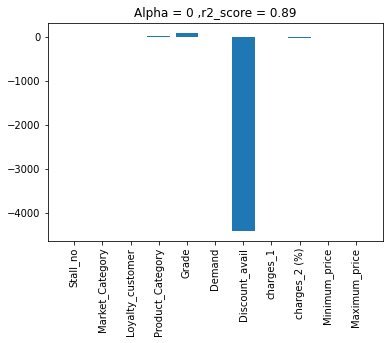

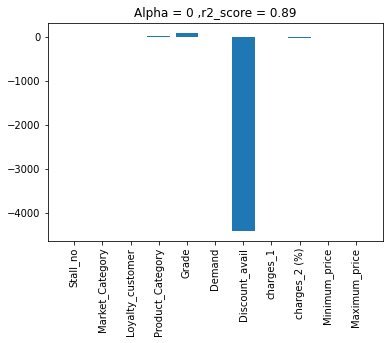

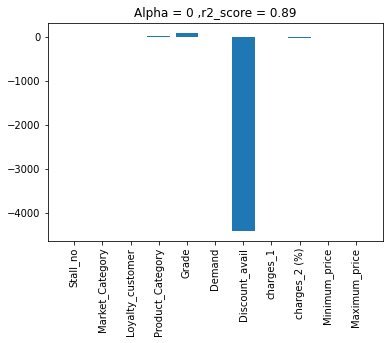

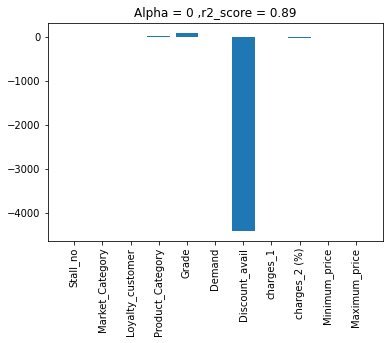

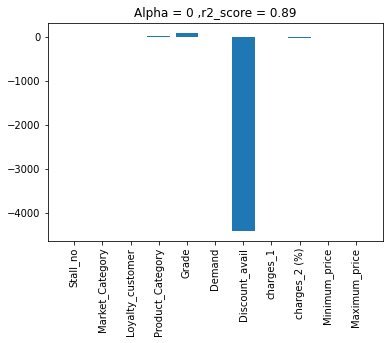

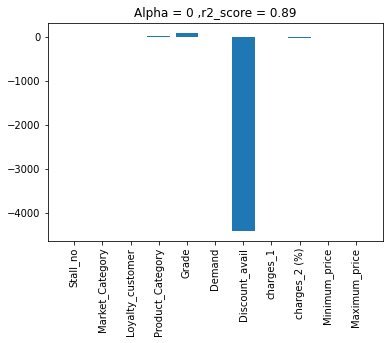

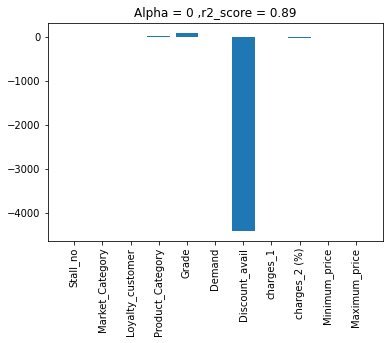

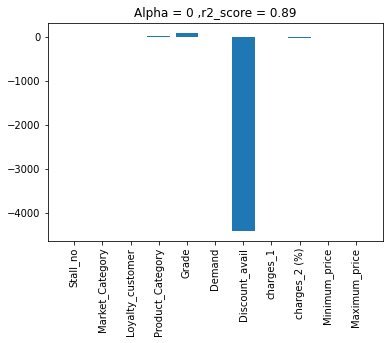

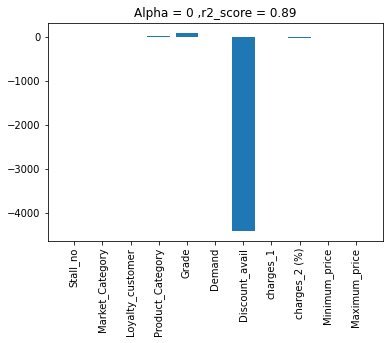

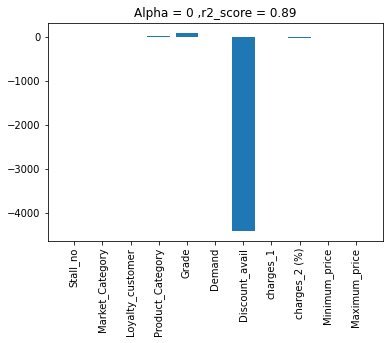

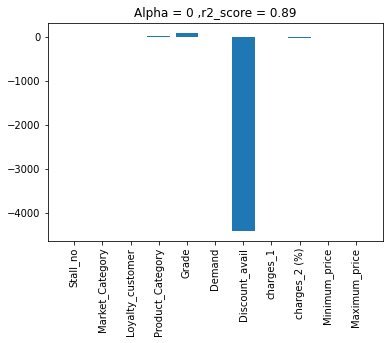

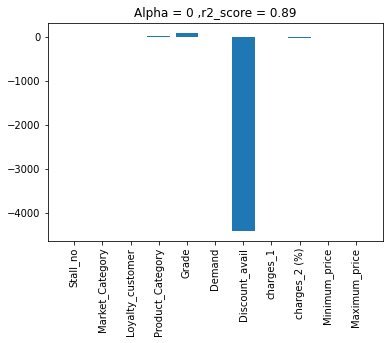

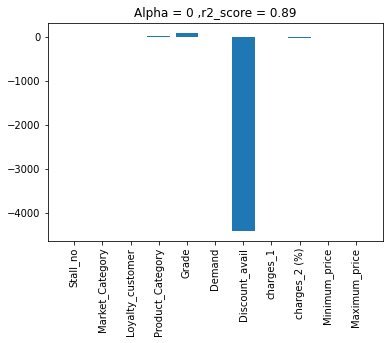

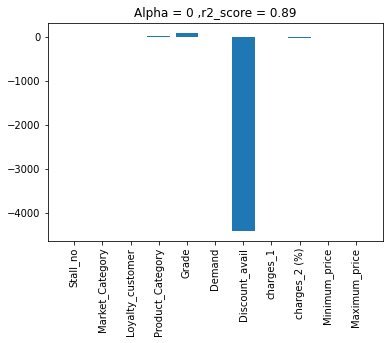

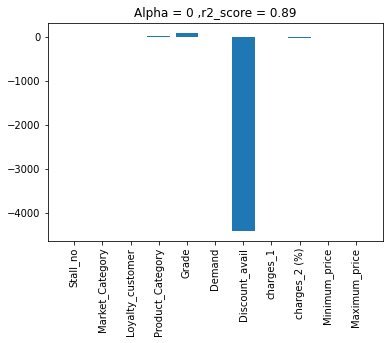

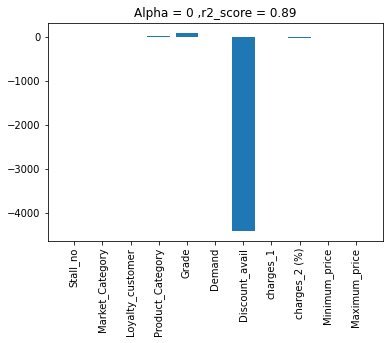

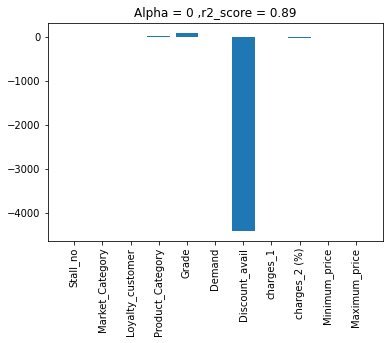

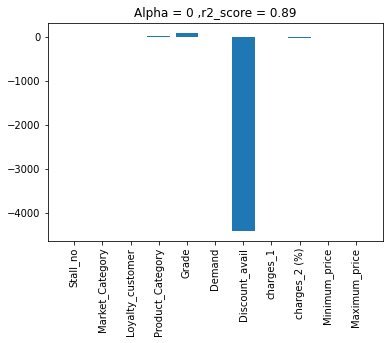

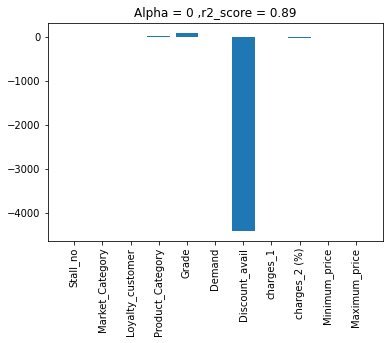

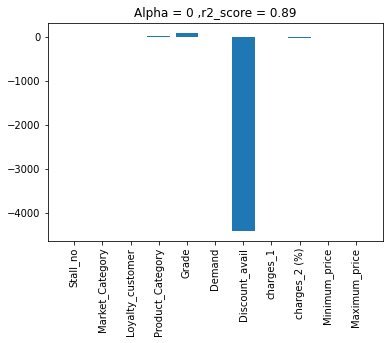

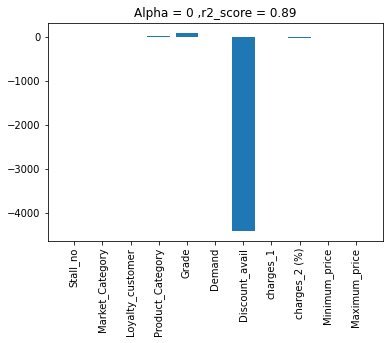

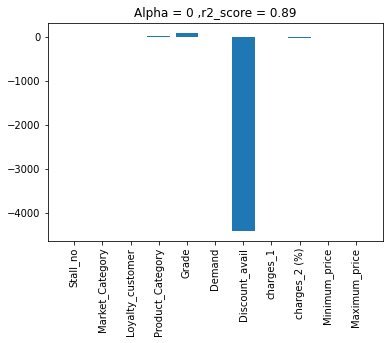

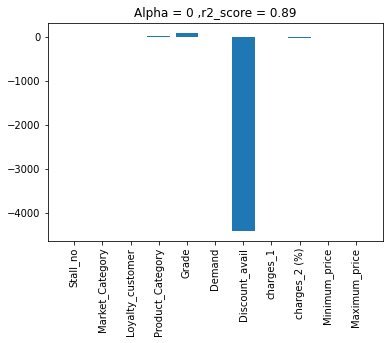

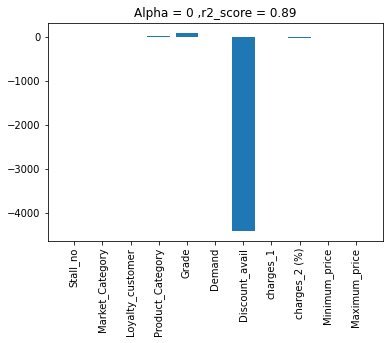

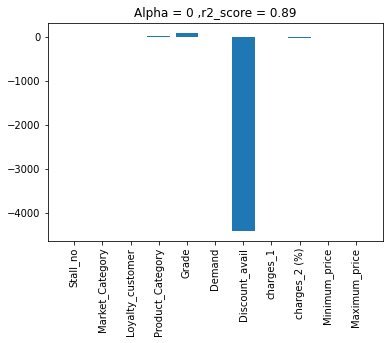

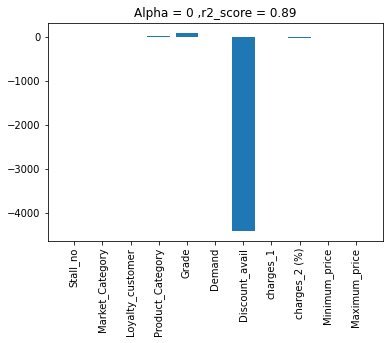

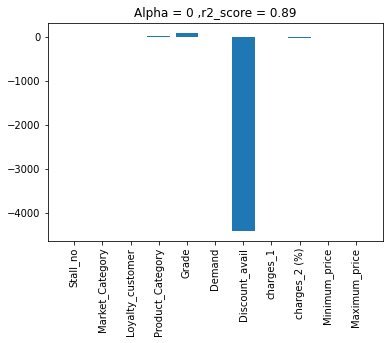

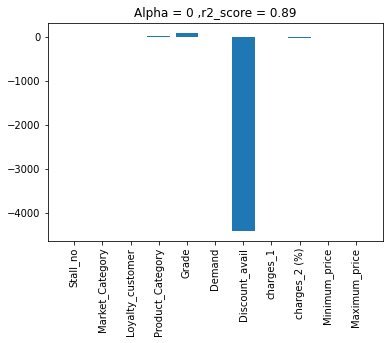

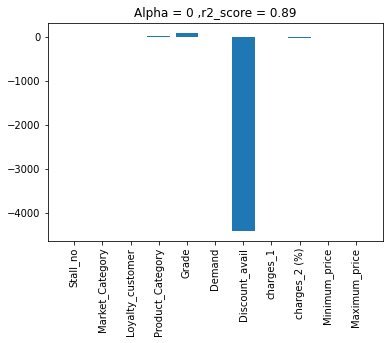

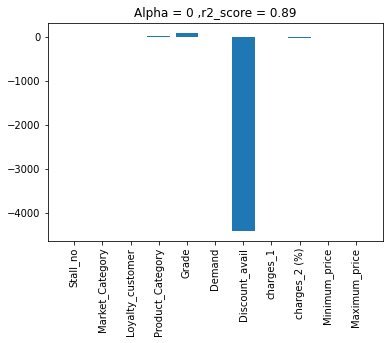

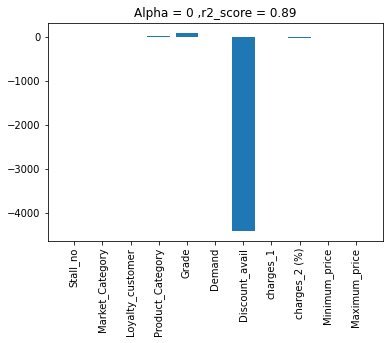

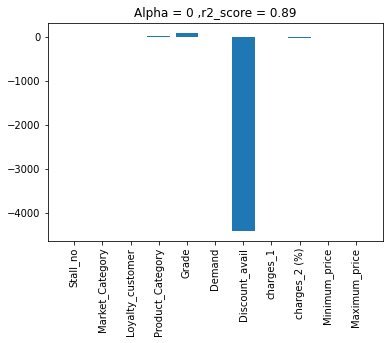

In [56]:
for i,value in enumerate(coefs):
  plt.bar(X_train.columns,value)
  plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_score_train_list[i],2)))
  plt.xticks(rotation = 90)
  plt.show()

In [57]:
max(r2_score_test_list),max(r2_score_train_list)

(0.9069607007659933, 0.8945432976509908)

In [42]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [58]:
from mlxtend.evaluate import bias_variance_decomp

In [60]:
alphas = np.linspace(0,1,100)
loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

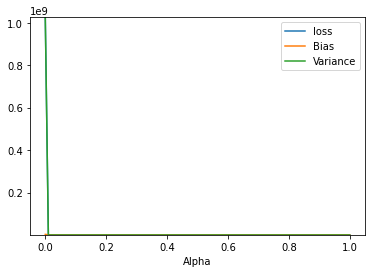

In [63]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(min(loss),max(loss))
plt.xlabel('Alpha')
plt.legend()

## Analysis

In [43]:
numeric_features = [feature for feature in df.columns if df[feature].dtype == 'int64' or df[feature].dtype == 'float64']

In [44]:
for feature in numeric_features:
  print(f'mean_{feature} : {df[feature].mean()}, median_{feature} : {df[feature].median()}, min_{feature} : {df[feature].min()}, max_{feature} : {df[feature].max()}, variance_{feature} : {df[feature].var()}')
  print()

mean_Stall_no : 25.311545510079412, median_Stall_no : 25.0, min_Stall_no : 1.0, max_Stall_no : 50.0, variance_Stall_no : 202.768782028634

mean_Market_Category : 199.336285888821, median_Market_Category : 136.5, min_Market_Category : 0, max_Market_Category : 471, variance_Market_Category : 28738.74572234537

mean_Loyalty_customer : 1.0, median_Loyalty_customer : 1.0, min_Loyalty_customer : 1.0, max_Loyalty_customer : 1.0, variance_Loyalty_customer : 0.0

mean_Product_Category : 4.340867440439829, median_Product_Category : 4.0, min_Product_Category : 0, max_Product_Category : 9, variance_Product_Category : 8.284629372584526

mean_Grade : 0.6786805131337813, median_Grade : 0.0, min_Grade : 0, max_Grade : 3, variance_Grade : 1.1072324777930762

mean_Demand : 51.17776420281002, median_Demand : 51.0, min_Demand : 1, max_Demand : 100, variance_Demand : 836.9534192587731

mean_Discount_avail : 0.14141722663408673, median_Discount_avail : 0.0, min_Discount_avail : 0.0, max_Discount_avail : 1.0

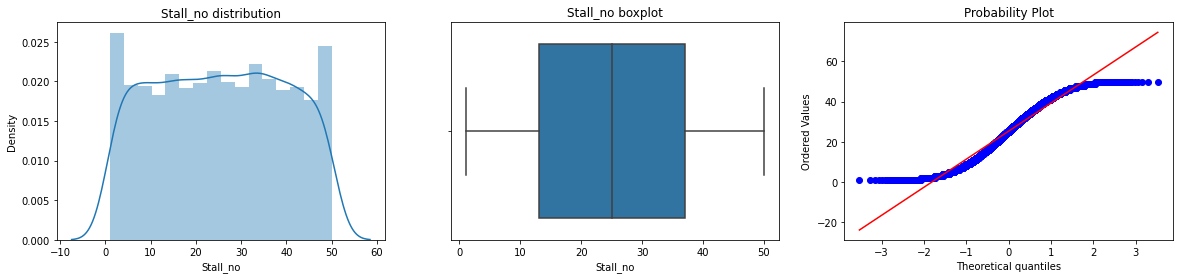

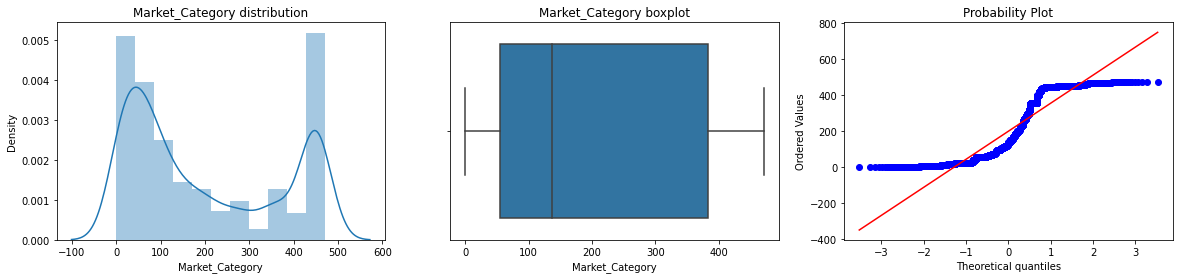

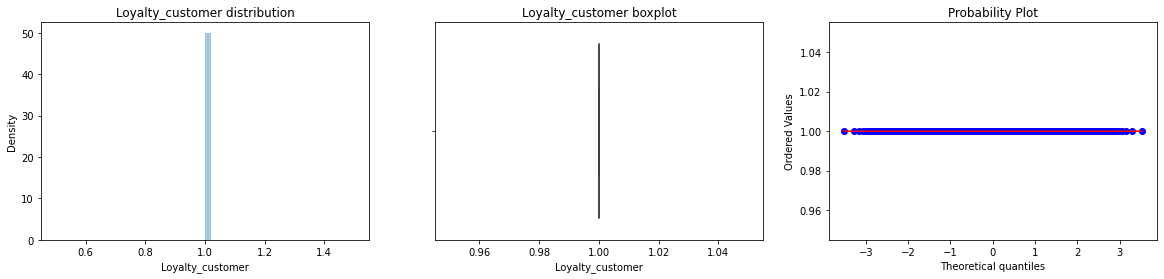

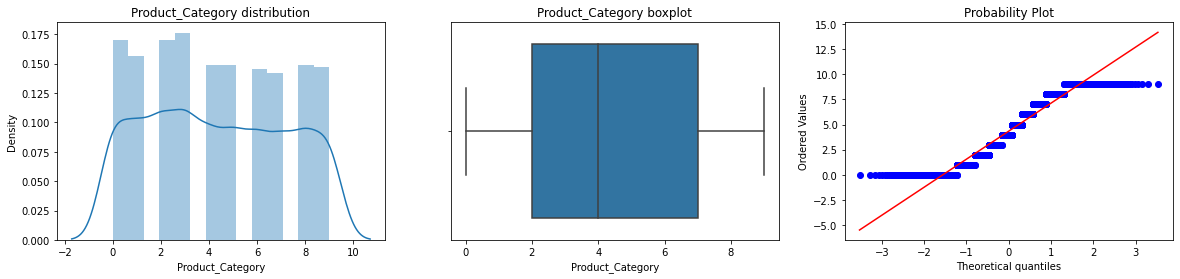

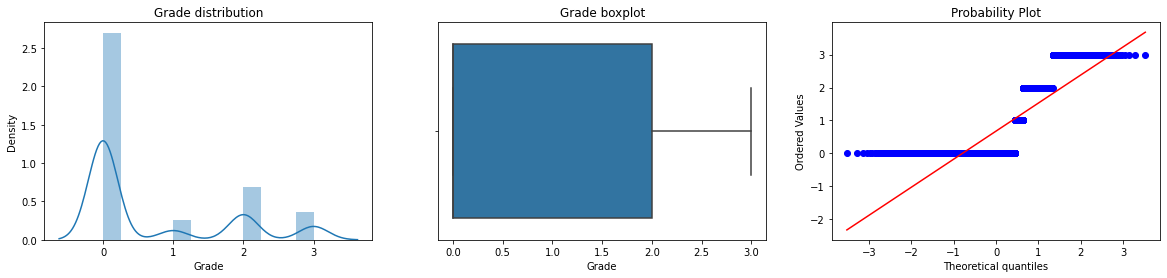

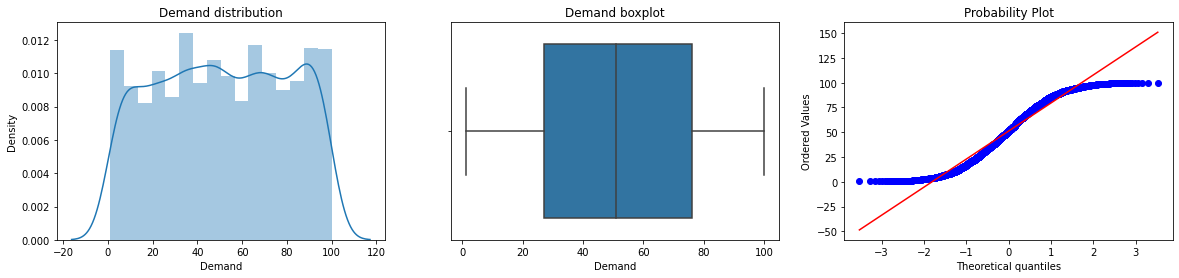

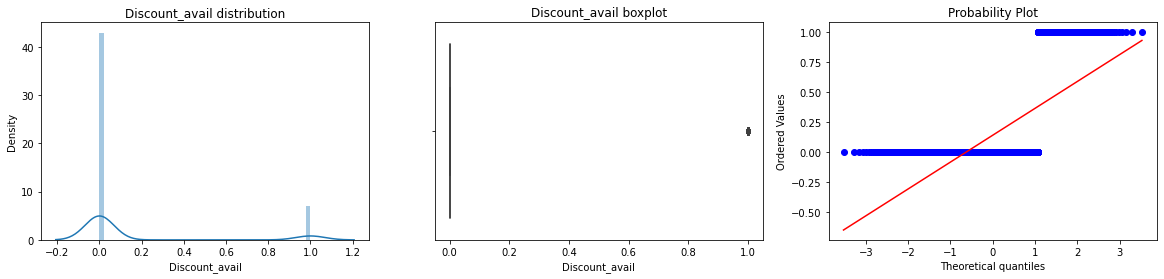

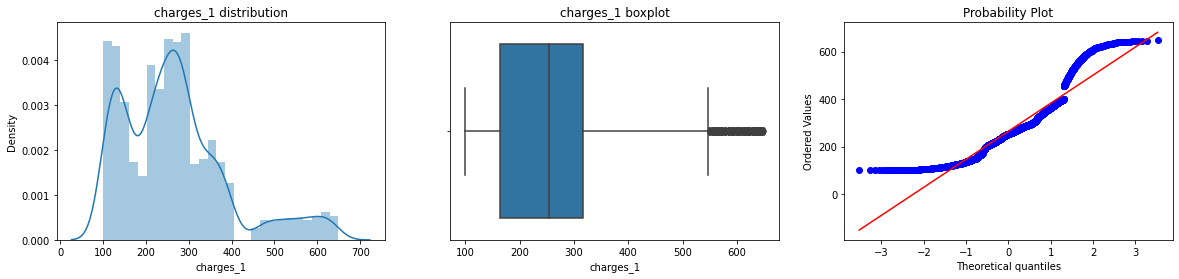

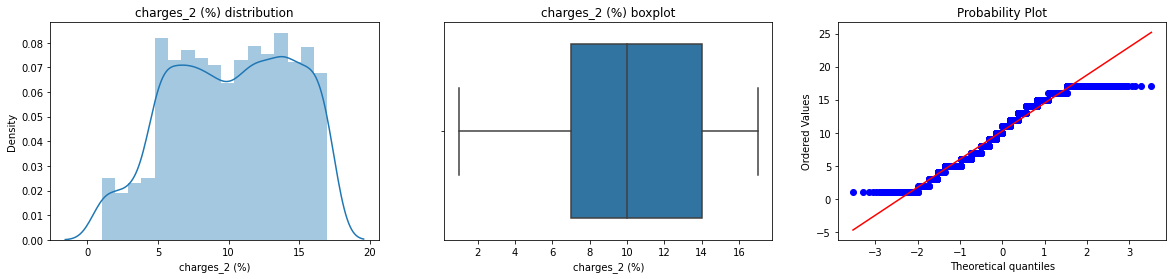

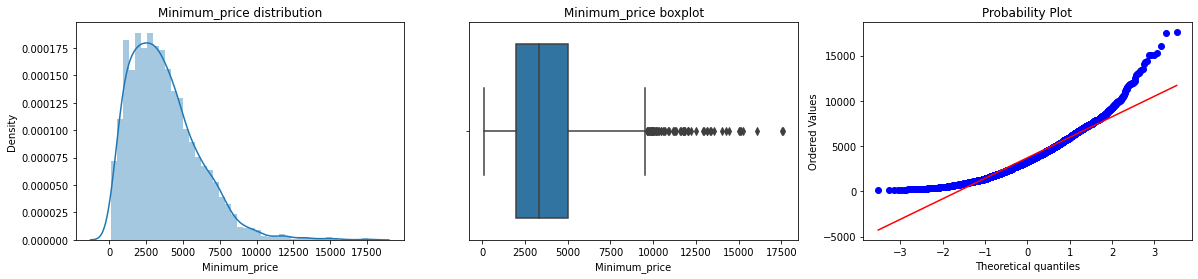

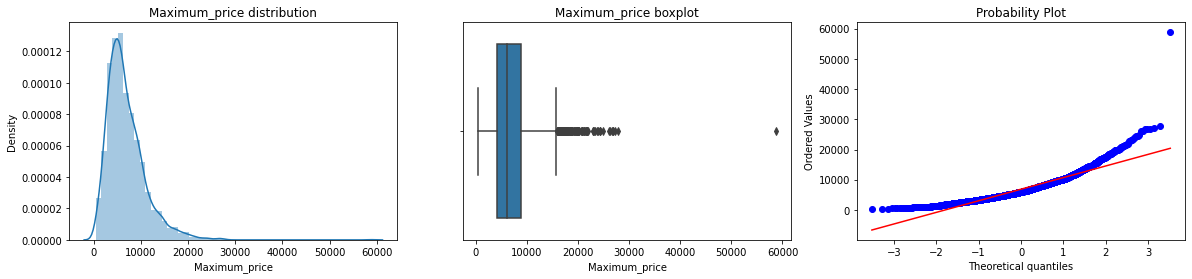

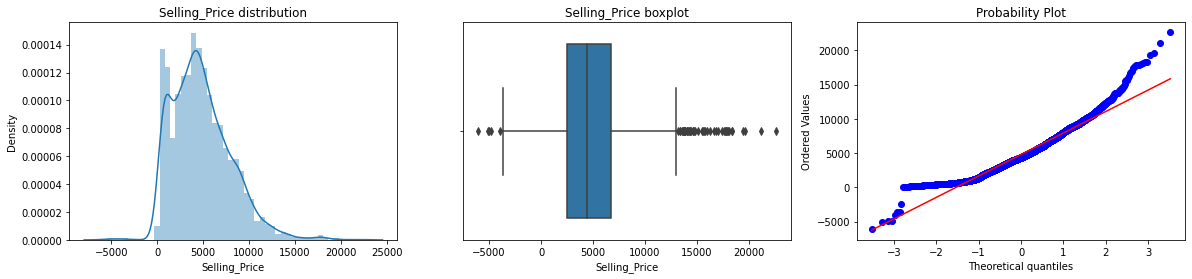

In [45]:
for feature in numeric_features:
    fig, ax = plt.subplots(1,3, figsize=(20,4))
    
    sns.distplot(df[feature],ax=ax[0]).set(title=f'{feature} distribution')
    
    sns.boxplot(df[feature],ax=ax[1]).set(title=f'{feature} boxplot')
    
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

Stall_no vs Selling_Price


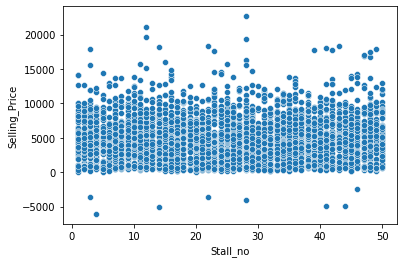

Market_Category vs Selling_Price


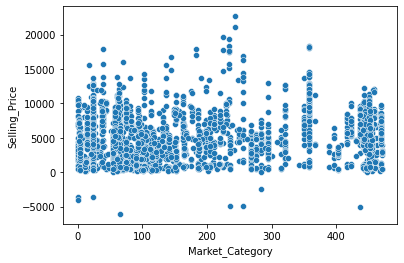

Loyalty_customer vs Selling_Price


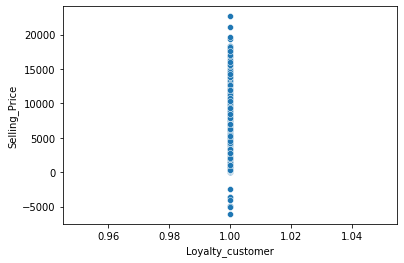

Product_Category vs Selling_Price


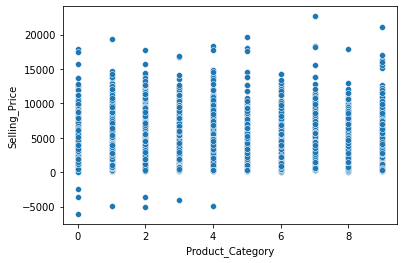

Grade vs Selling_Price


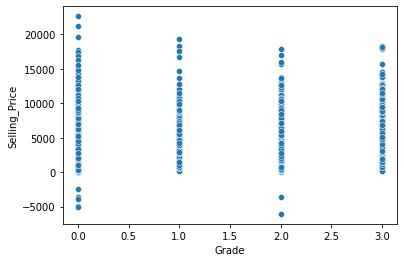

Demand vs Selling_Price


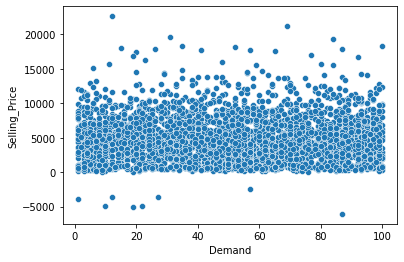

Discount_avail vs Selling_Price


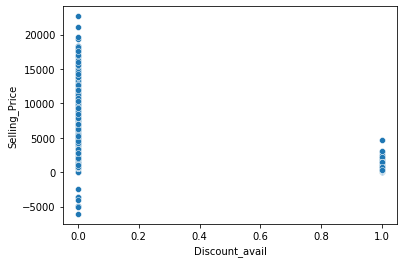

charges_1 vs Selling_Price


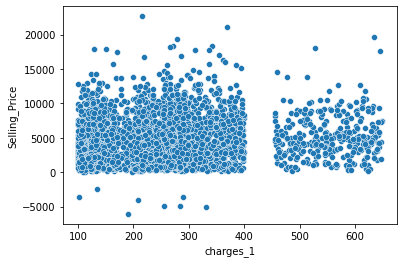

charges_2 (%) vs Selling_Price


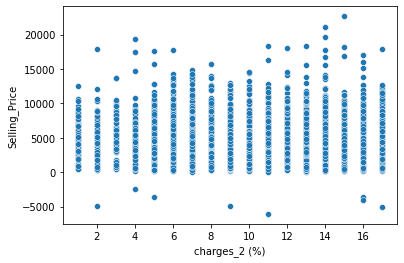

Minimum_price vs Selling_Price


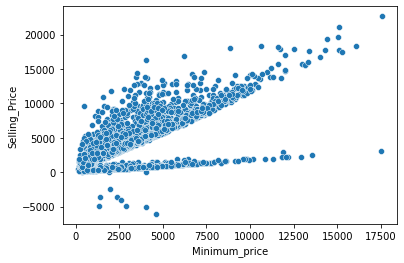

Maximum_price vs Selling_Price


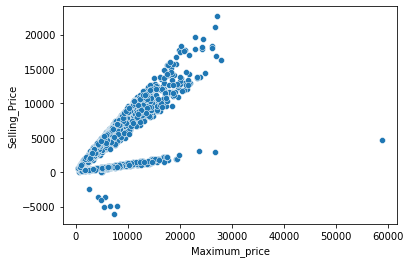

In [46]:
for feature in numeric_features:
  if feature == 'Selling_Price':
    pass
  else:
    print(f'{feature} vs Selling_Price')
    sns.scatterplot(df[feature],df['Selling_Price'])
    plt.show()  